In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
games = pd.read_csv('../Version_one/modified_games.csv')

In [58]:
from sklearn.preprocessing import normalize
X = normalize(games[ [ 'abs_diff_rating', 'turns', 'higher_rated_white' ] ])

In [59]:
X_names = ['abs_diff_rating', 'turns', 'higher_rated_white']

In [48]:
y = games[ 'higher_rating_won' ]    # Back to binary

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
the_tree = DecisionTreeClassifier()
bag = BaggingClassifier( base_estimator = the_tree, n_estimators = 100, random_state = 1)
bag.fit( X_train, y_train )

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [62]:
exp_tree = bag.estimators_[0]

In [41]:
import sklearn.tree

In [57]:
games.columns

Index(['abs_diff_rating', 'higher_rating_won', 'result', 'higher_rated_white',
       'turns'],
      dtype='object')

In [44]:
games.columns

Index(['Unnamed: 0', 'abs_diff_rating', 'higher_rating_won', 'result',
       'higher_rated_white', 'turns'],
      dtype='object')

In [29]:
sklearn.tree.plot_tree( bag.estimators_[0] )

[Text(180.09652074437102, 215.7673846153846, 'X[0] <= 0.888\ngini = 0.47\nsamples = 10176\nvalue = [6054, 9978]'),
 Text(80.81741711439349, 212.42215384615383, 'X[1] <= 1.0\ngini = 0.5\nsamples = 4907\nvalue = [3768, 3942]'),
 Text(80.67395601245295, 209.07692307692307, 'X[1] <= 0.823\ngini = 0.499\nsamples = 4810\nvalue = [3617, 3942]'),
 Text(22.04999097387672, 205.7316923076923, 'X[1] <= 0.477\ngini = 0.49\nsamples = 2438\nvalue = [1656, 2203]'),
 Text(3.1830431993060344, 202.38646153846153, 'X[0] <= 0.883\ngini = 0.496\nsamples = 118\nvalue = [98, 82]'),
 Text(1.5063415703758136, 199.04123076923076, 'X[2] <= 0.008\ngini = 0.437\nsamples = 42\nvalue = [44, 21]'),
 Text(1.1476888155244294, 195.696, 'X[1] <= 0.476\ngini = 0.375\nsamples = 33\nvalue = [39, 13]'),
 Text(1.0042277135838757, 192.35076923076923, 'X[0] <= 0.88\ngini = 0.411\nsamples = 28\nvalue = [32, 13]'),
 Text(0.7173055097027683, 189.00553846153846, 'X[0] <= 0.88\ngini = 0.408\nsamples = 5\nvalue = [2, 5]'),
 Text(0.573

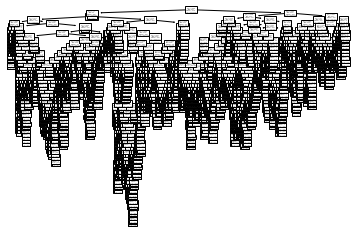

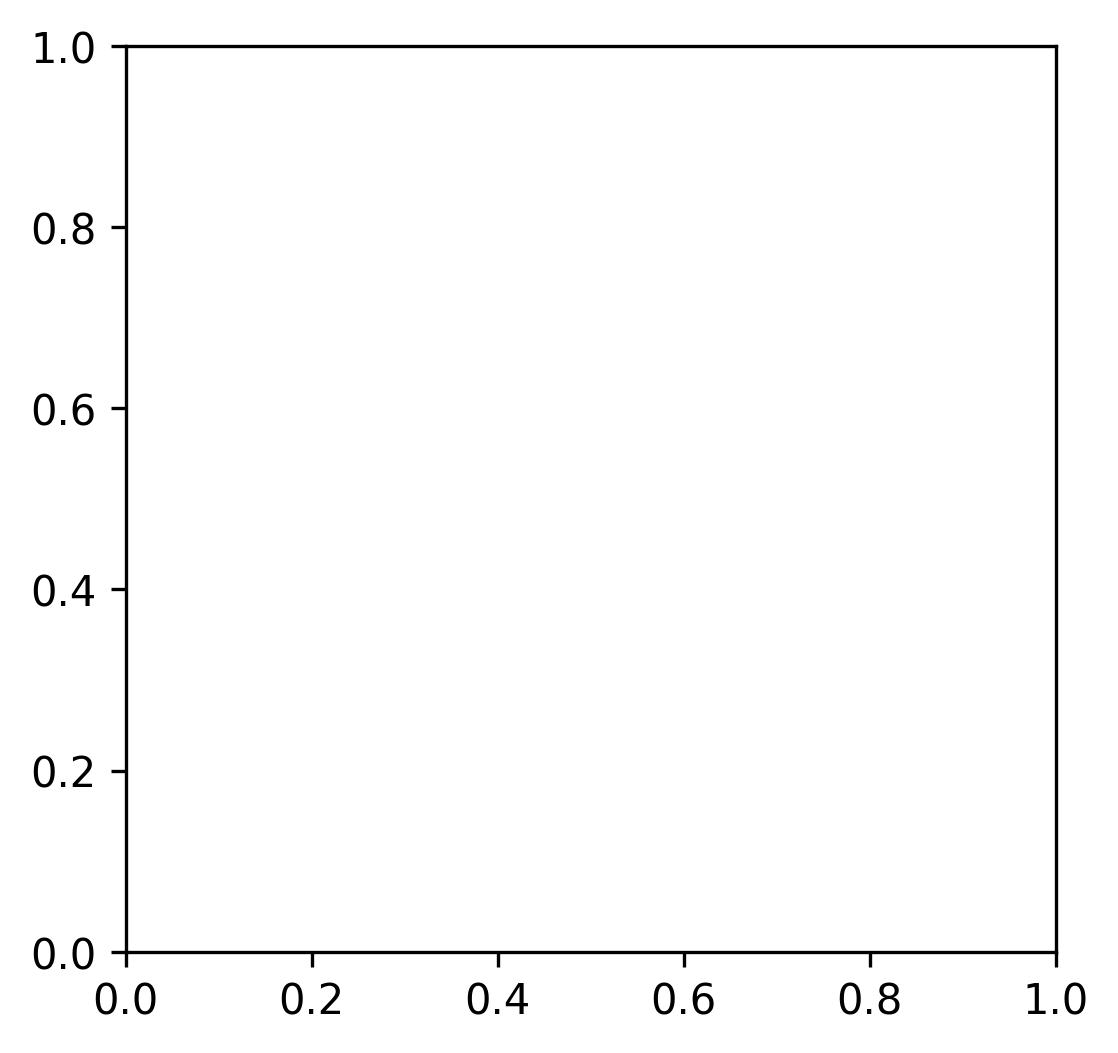

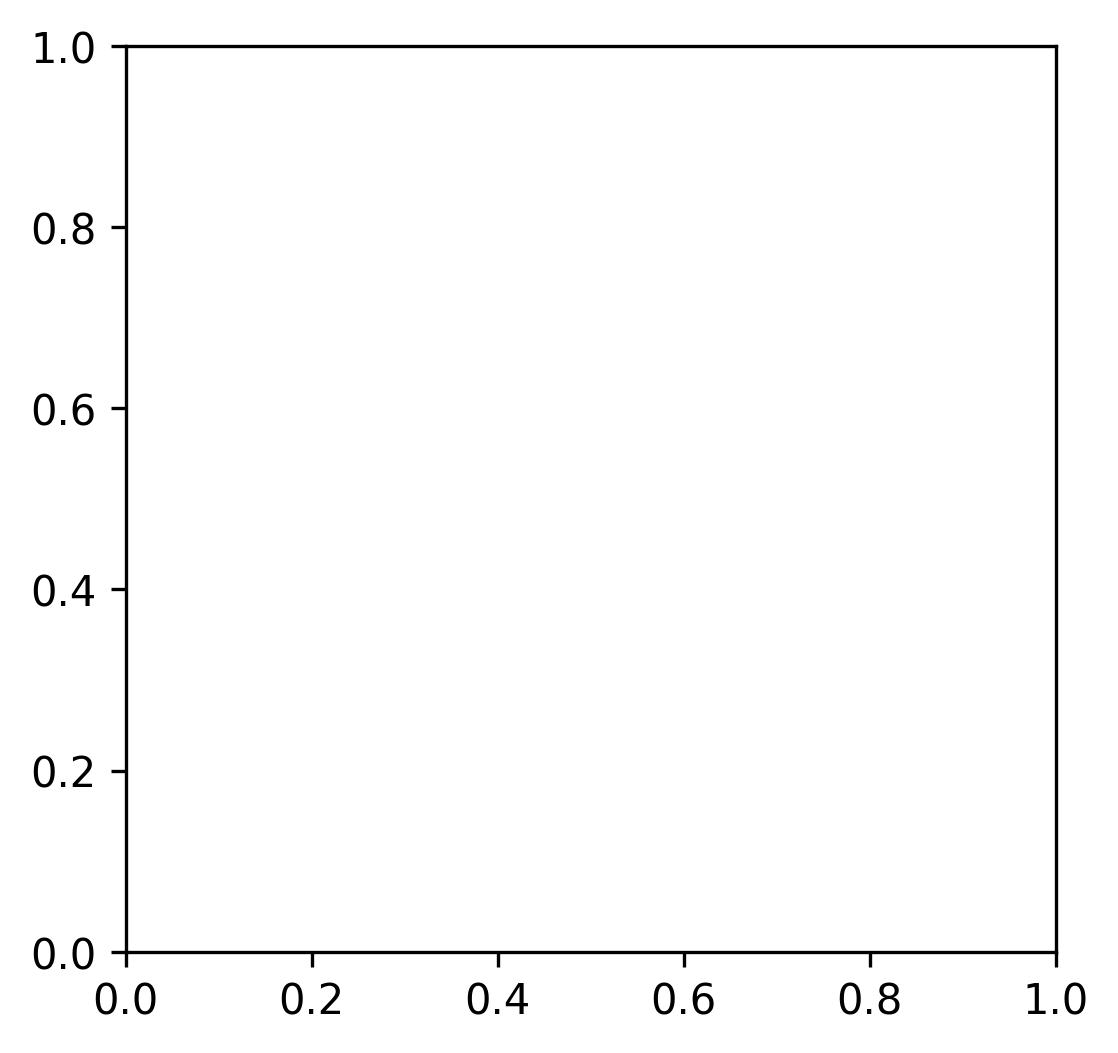

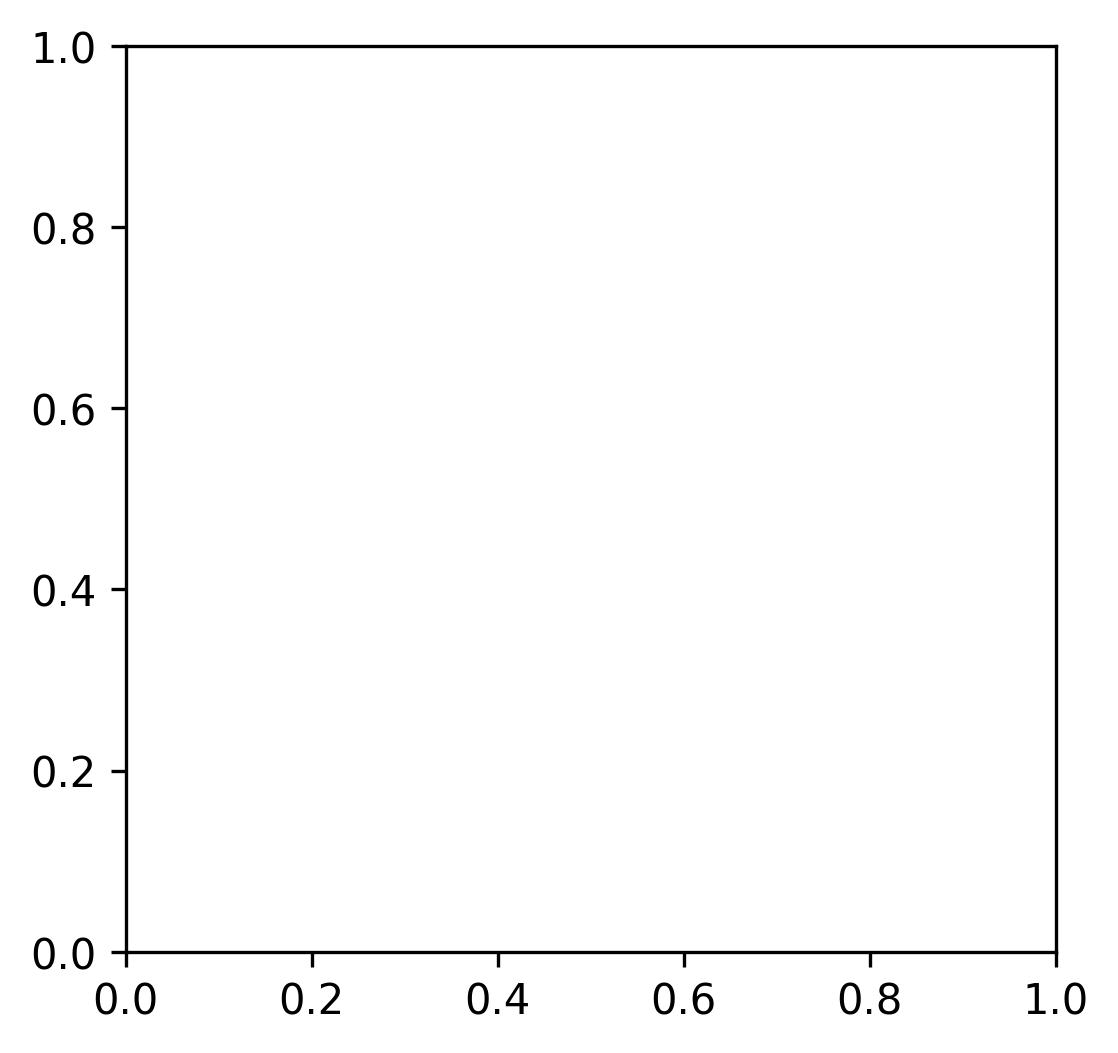

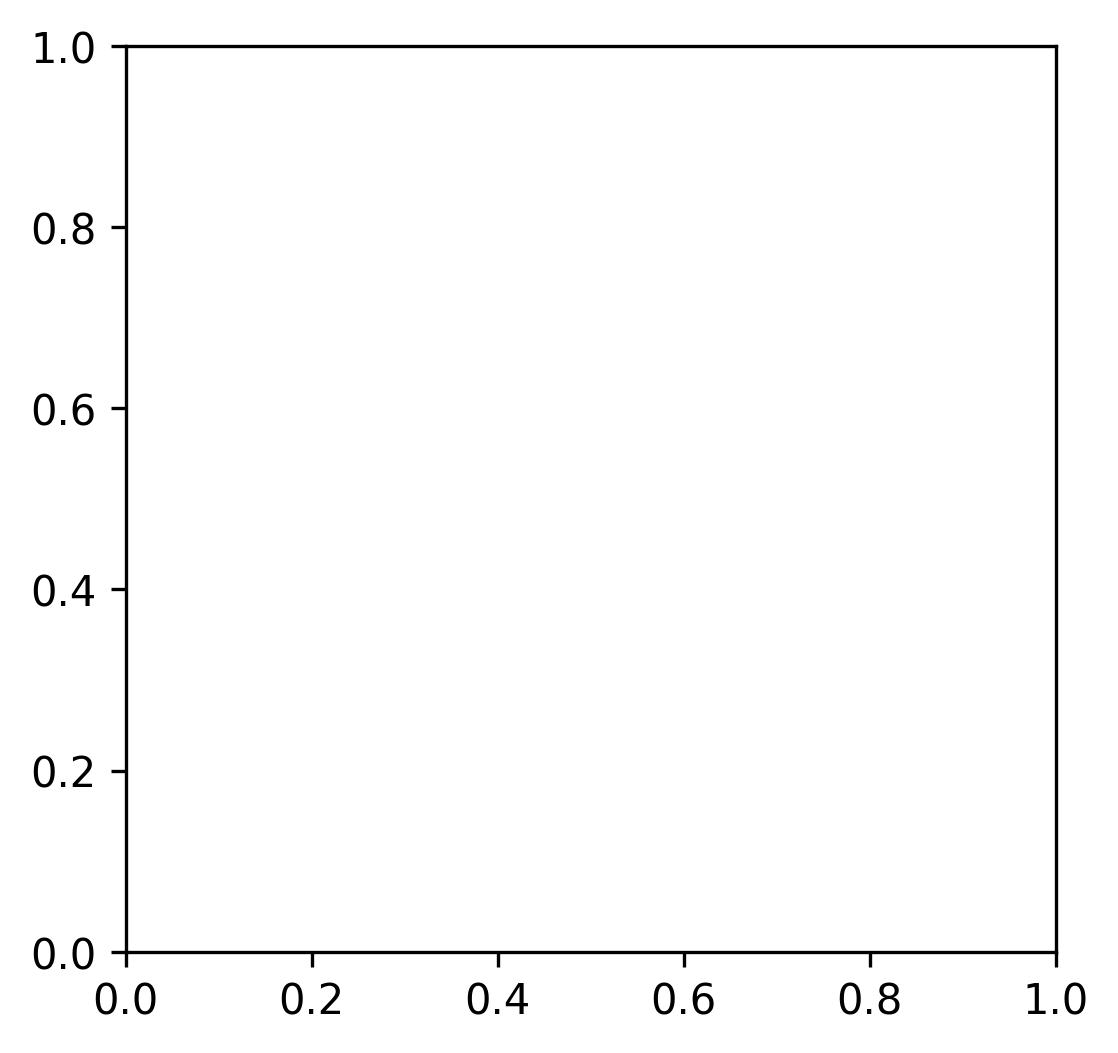

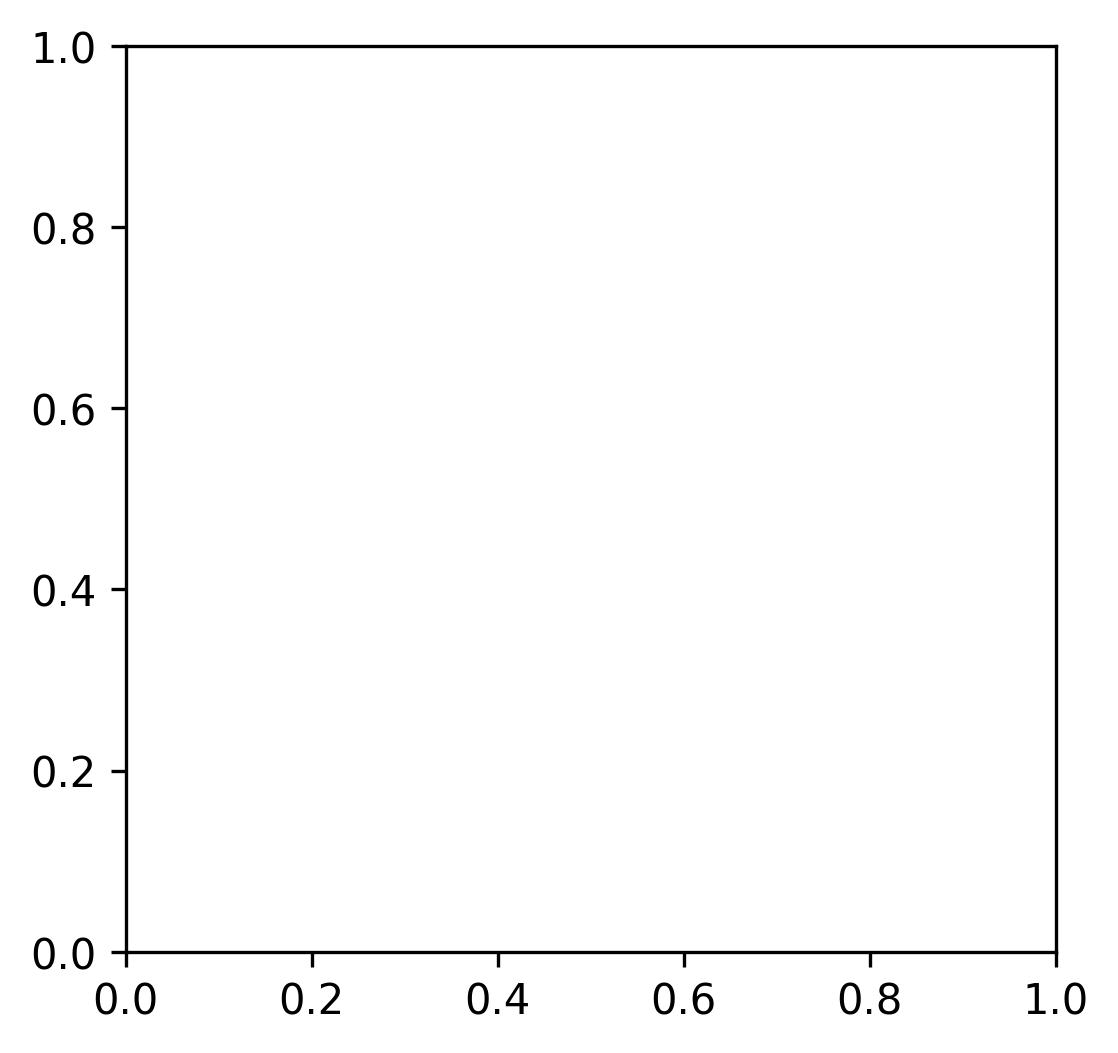

KeyboardInterrupt: 

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

sklearn.tree.plot_tree( bag.estimators_[0] ,
           feature_names = X_names, 
           class_names= ['loss', 'win'],
           filled = True);
plt.show()

In [85]:
exp_tree.tree_.n_leaves

3689

In [86]:
X = games[ [ 'abs_diff_rating', 'turns', 'higher_rated_white' ] ]

In [87]:
single_tree = DecisionTreeClassifier( ccp_alpha = 0.001 )

In [88]:
single_tree.fit( X, y)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
single_tree.tree_.n_leaves

7

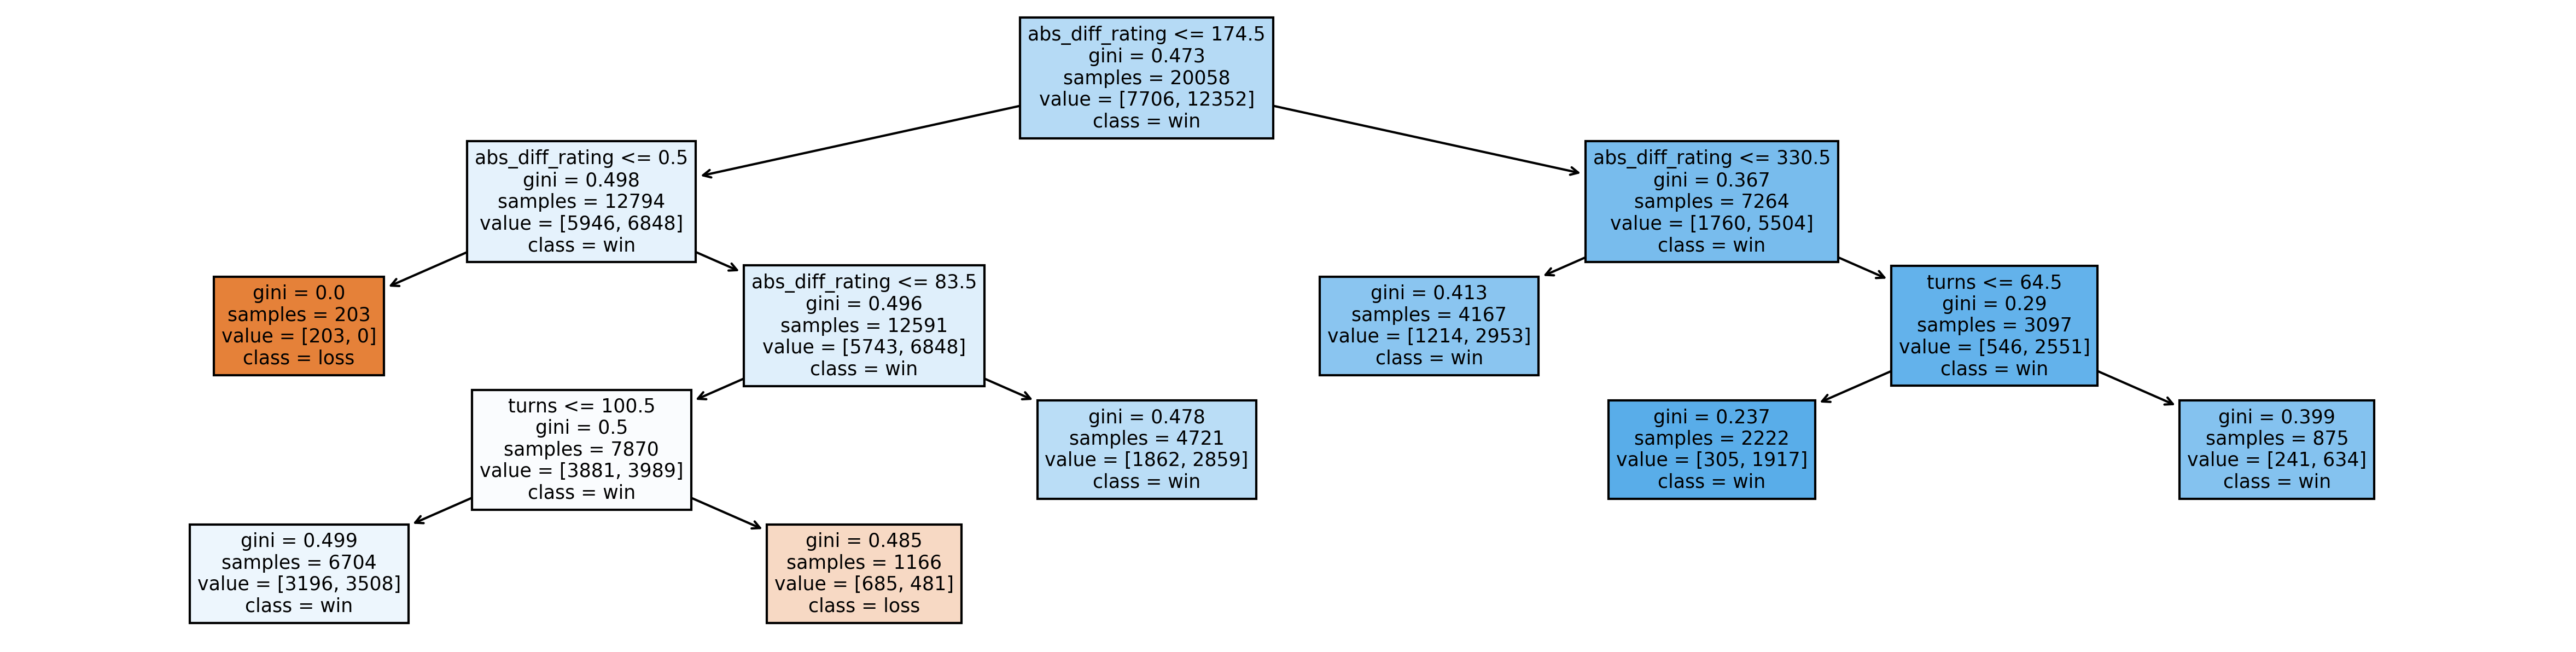

In [90]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5), dpi=300)

sklearn.tree.plot_tree( single_tree ,
           feature_names = X_names, 
           class_names= ['loss', 'win'],
           filled = True);
plt.show()

In [91]:
single_tree.tree_.compute_feature_importances()

array([0.93375975, 0.06624025, 0.        ])